In [1]:
import numpy as np
import pandas as pd
import mglearn
from matplotlib import pyplot as plt

# 设置输出保留精度
np.set_printoptions(3)

/home/inory/.local/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/home/inory/.local/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


# 基本概念

**连续特征**(continuous feature): 连续的数值特征

**离散特征**(discrete feature): 离散的非数值特征，无数值意义，分类等信息

**特征工程**(feature engineering): 找到最佳的数据表示

# adult数据集

- 美国成年人收入数据集， 从1994年普查数据中导出
- 任务为预测一名工人的收入是否高于50000 美元
- 数据特征包括工人的年龄、雇佣方式、教育水平、性别、每周工作时长、职业等

数据集展示

In [2]:
data = pd.read_csv('data/adult.data', header=None, index_col=False,
                   names=['age', 'workclass', 'fnlwgt', 'education', 'education-num',
                          'marital-status', 'occupation', 'relationship', 'race', 'gender',
                          'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'])
filtered_data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income']]
filtered_data.head()

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


# 分类变量

## 将分类转为one-hot 编码（虚拟变量）

### 检查字符串编码的分类数据

In [3]:
print(filtered_data.gender.value_counts())

 Male      21790
 Female    10771
Name: gender, dtype: int64


### 使用pandas编码数据

In [4]:
# get_dummies 自动变换所有具有对象类型的列或所有分类的列
print('Original features:\n', list(filtered_data.columns))
data_dummies = pd.get_dummies(filtered_data)
print('Features after get_dummies:\n', list(data_dummies.columns))

Original features:
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income']
Features after get_dummies:
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-ins

编码后的数据显示

In [5]:
data_dummies.head()

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


### 构造数据集

- 从age到occupation_ Transport-moving的部分是输入部分
- income为预测输出
- pandas的列索引包括范围结尾

In [6]:
# loc取值包括最后内容， loc：通过索引标签取值， iloc：通过索引数值取值
features = data_dummies.loc[:, 'age': 'occupation_ Transport-moving']
X = features.values
y = data_dummies['income_ >50K'].values
print('Shape of X:', X.shape)
print('Shape of y', y.shape)

Shape of X: (32561, 44)
Shape of y (32561,)


### 使用模型预测

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
model = LogisticRegression().fit(X_train, y_train)
print('Train score:{:.2f}'.format(model.score(X_train, y_train)))
print('Test score:{:.2f}'.format(model.score(X_test, y_test)))

Train score:0.81
Test score:0.81


/home/inory/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## 将代表分类的数字编码为 one-hot

创建一个包含整数和字符串的特征

In [8]:
demo_df = pd.DataFrame({'Integer Feature':[0, 1, 2, 1],
                        'Catgorial Feature': ['socks', 'fox', 'socks', 'box']})
demo_df

,Integer Feature,Catgorial Feature
0,0,socks
1,1,fox
2,2,socks
3,1,box


get_dummies 只编码字符串特征，不编码字符串特征

In [9]:
pd.get_dummies(demo_df)

,Integer Feature,Catgorial Feature_box,Catgorial Feature_fox,Catgorial Feature_socks
0,0,0,0,1
1,1,0,1,0
2,2,0,0,1
3,1,1,0,0


### 指定要编码的类

In [10]:
pd.get_dummies(demo_df, columns=['Integer Feature', 'Catgorial Feature'])

,Integer Feature_0,Integer Feature_1,Integer Feature_2,Catgorial Feature_box,Catgorial Feature_fox,Catgorial Feature_socks
0,1,0,0,0,0,1
1,0,1,0,0,1,0
2,0,0,1,0,0,1
3,0,1,0,1,0,0


### 将数字列转为字符串

In [11]:
demo_df['Integer Feature'] = demo_df['Integer Feature'].astype(str)
pd.get_dummies(demo_df)

,Integer Feature_0,Integer Feature_1,Integer Feature_2,Catgorial Feature_box,Catgorial Feature_fox,Catgorial Feature_socks
0,1,0,0,0,0,1
1,0,1,0,0,1,0
2,0,0,1,0,0,1
3,0,1,0,1,0,0


# 分箱(binning)也叫离散化(discretization)

## 在wave数据集上比较线性回归和决策树

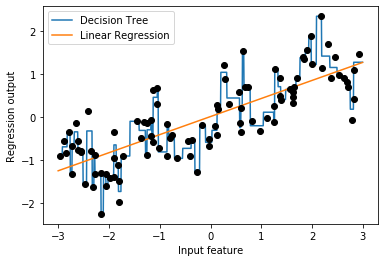

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)  # shape: (1000, 1)

dtr = DecisionTreeRegressor(min_samples_split=3).fit(X, y)
plt.plot(line, dtr.predict(line), label='Decision Tree')

lr = LinearRegression().fit(X, y)
plt.plot(line, lr.predict(line), label='Linear Regression')

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel('Regression output')
plt.xlabel('Input feature')
plt.legend(loc='best')
plt.show()

## 数据分箱

In [13]:
# 创建10个箱子
bins = np.linspace(-3, 3, 11)
print('bins:', bins)

# 分箱
which_bin = np.digitize(X, bins=bins) - 1
print('Data points:\n', X[:5])
print('Bin membership for data points:\n', which_bin[:5])

bins: [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]
Data points:
 [[-0.753]
 [ 2.704]
 [ 1.392]
 [ 0.592]
 [-2.064]]
Bin membership for data points:
 [[3]
 [9]
 [7]
 [5]
 [1]]


## 分箱结果使用one-hot编码

In [14]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, n_values=10)
X_binned = encoder.fit_transform(which_bin)
print(X_binned[:10])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


/home/inory/.local/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:373: DeprecationWarning: Passing 'n_values' is deprecated in version 0.20 and will be removed in 0.22. You can use the 'categories' keyword instead. 'n_values=n' corresponds to 'categories=[range(n)] * n_features'.
  warnings.warn(msg, DeprecationWarning)


## 使用分箱的输入预测

由结果得到，分箱提高了输入特征数， 可以提高线性模型的灵活性

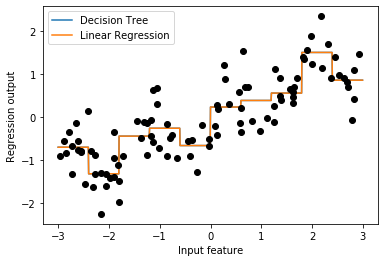

In [15]:
line_binned = encoder.transform(np.digitize(line, bins=bins) - 1)

dtr = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, dtr.predict(line_binned), label='Decision Tree')

lr = LinearRegression().fit(X_binned, y)
plt.plot(line, lr.predict(line_binned), label='Linear Regression')

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel('Regression output')
plt.xlabel('Input feature')
plt.legend(loc='best')
plt.show()

# 交互特征与多项式特征

要想丰富特征表示，尤其是对于线性模型，可以添加原始数据的**交互特征(interaction feature)** 和 **多项式特征(ploynomial feature)**

## 在分箱数据中重新加入原始特征

- 分箱数据可以学到不同分箱内的截距特征
- 加入原始特征可以学到斜率特征
- 添加一维原始特征后，模型在每个箱子中学到的斜率相同



Shape of X_combined: (100, 11)


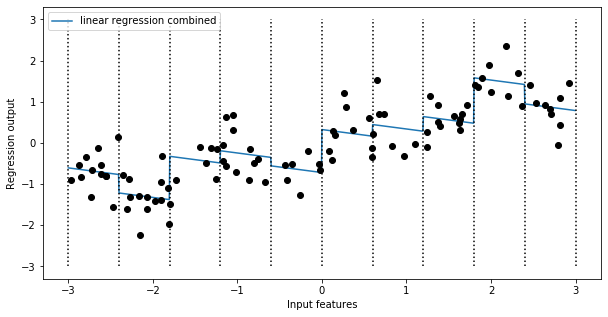

In [16]:
X_combined = np.hstack([X, X_binned])
print('Shape of X_combined:', X_combined.shape)

lr = LinearRegression().fit(X_combined, y)
line_combined = np.hstack([line, line_binned])

fig = plt.figure(figsize=(10, 5))
plt.plot(line, lr.predict(line_combined), label='linear regression combined')

plt.plot(X[:, 0], y, 'o', c='k')
for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k')

plt.xlabel('Input features')
plt.ylabel('Regression output')
plt.legend(loc=2)
plt.show()

## 在分箱数据中加入交互特征

- 添加分箱特征和原始数据的乘积
- 引入新特征的维数相当于箱子数目
- 在每个箱子中可以学到自己的偏移和斜率

Shape of X_product: (100, 20)


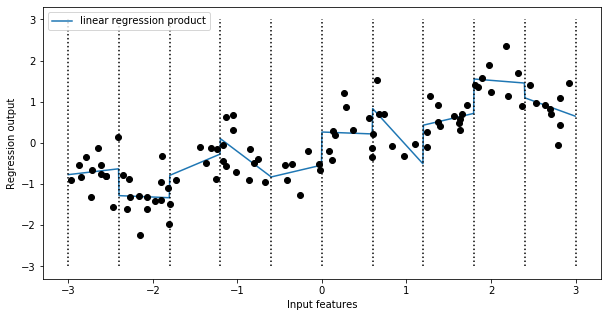

In [17]:
X_product = np.hstack([X_binned, X * X_binned])
print('Shape of X_product:', X_product.shape)

lr = LinearRegression().fit(X_product, y)
line_product = np.hstack([line_binned, line * line_binned])

fig = plt.figure(figsize=(10, 5))
plt.plot(line, lr.predict(line_product), label='linear regression product')

plt.plot(X[:, 0], y, 'o', c='k')
for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k')

plt.xlabel('Input features')
plt.ylabel('Regression output')
plt.legend(loc=2)
plt.show()

## 使用多项式特征

可以使用原始特征的多项式(polynomial)扩展连续特征

In [18]:
from sklearn.preprocessing import PolynomialFeatures

# 包含直到X ** 10 的多项式
# 默认的include_bias=True添加恒等于1的常数特征, 即 [X ** 0, X ** 1, ..., X ** 10]共11维
poly = PolynomialFeatures(degree=10, include_bias=False)
X_poly = poly.fit_transform(X)
print('X:\n{}'.format(X[:5]))
print('X_poly:\n{}'.format(X_poly[:5]))
print('Shape of X_poly:', X_poly.shape)

print('Polynomial feature names:', poly.get_feature_names())

X:
[[-0.753]
 [ 2.704]
 [ 1.392]
 [ 0.592]
 [-2.064]]
X_poly:
[[-7.528e-01  5.666e-01 -4.265e-01  3.211e-01 -2.417e-01  1.819e-01
  -1.370e-01  1.031e-01 -7.761e-02  5.842e-02]
 [ 2.704e+00  7.313e+00  1.978e+01  5.348e+01  1.446e+02  3.911e+02
   1.058e+03  2.860e+03  7.735e+03  2.092e+04]
 [ 1.392e+00  1.938e+00  2.697e+00  3.754e+00  5.226e+00  7.274e+00
   1.013e+01  1.409e+01  1.962e+01  2.731e+01]
 [ 5.920e-01  3.504e-01  2.074e-01  1.228e-01  7.268e-02  4.302e-02
   2.547e-02  1.508e-02  8.924e-03  5.283e-03]
 [-2.064e+00  4.260e+00 -8.791e+00  1.814e+01 -3.745e+01  7.729e+01
  -1.595e+02  3.292e+02 -6.795e+02  1.402e+03]]
Shape of X_poly: (100, 10)
Polynomial feature names: ['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


### 多项式回归

多项式回归可以做出光滑的拟合，但在数据少或者边界处可能有极端的表现

[ 1.201  0.801 -1.401 -0.667  0.681  0.22  -0.116 -0.03   0.006  0.001]


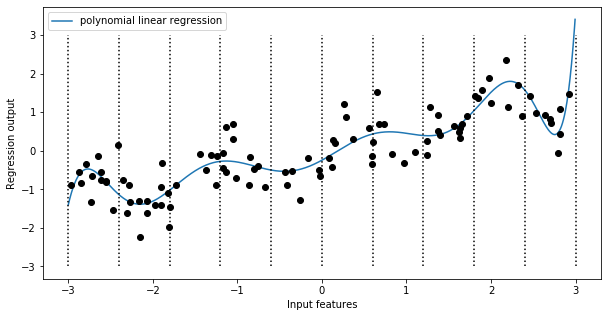

In [19]:
lr = LinearRegression().fit(X_poly, y)
line_poly = poly.transform(line)

print(lr.coef_)
fig = plt.figure(figsize=(10, 5))
plt.plot(line, lr.predict(line_poly), label='polynomial linear regression')

plt.plot(X[:, 0], y, 'o', c='k')
for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k')

plt.xlabel('Input features')
plt.ylabel('Regression output')
plt.legend(loc=2)
plt.show()

对比SVR的表现, 更加复杂的SVR可以学到与多项式回归类似的结果，而且不需要显示的特征变换

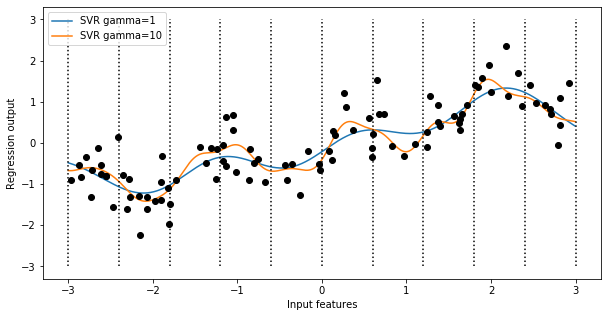

In [20]:
from sklearn.svm import SVR
fig = plt.figure(figsize=(10, 5))
for gamma in [1, 10]:
    svr = SVR(gamma=gamma).fit(X, y)
    plt.plot(line, svr.predict(line), label='SVR gamma={}'.format(gamma))

plt.plot(X[:, 0], y, 'o', c='k')
for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k')

plt.xlabel('Input features')
plt.ylabel('Regression output')
plt.legend(loc=2)
plt.show()

## 波士顿房价数据中的应用

获取所有的2交互特征

In [21]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target,
                                                    random_state=0)

scaller = MinMaxScaler().fit(X_train)
X_train_scalled = scaller.transform(X_train)
X_test_scalled = scaller.transform(X_test)

# 获取交互特征
poly = PolynomialFeatures(degree=2).fit(X_train_scalled)
print('polynomial feature names:\n', poly.get_feature_names())
X_train_poly = poly.transform(X_train_scalled)
X_test_poly = poly.transform(X_test_scalled)
print('shape of X_train:', X_train.shape)
print('shape of X_train_poly:', X_train_poly.shape)

polynomial feature names:
 ['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']
shape of X_train: (379, 13)
shape of X_tr

岭回归预测

In [22]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_scalled, y_train)
print('Score without polynomial:', ridge.score(X_test_scalled, y_test))
ridge = Ridge().fit(X_train_poly, y_train)
print('Score with polynomial:', ridge.score(X_test_poly, y_test))

Score without polynomial: 0.6214583227921031
Score with polynomial: 0.7534782020980572


随机森林预测, 添加交互特征和多项式特征反而会降低性能

In [23]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100).fit(X_train_scalled, y_train)
print('Score without polynomial:', rf.score(X_test_scalled, y_test))
rf = RandomForestRegressor(n_estimators=100).fit(X_train_poly, y_train)
print('Score with polynomial:', rf.score(X_test_poly, y_test))

Score without polynomial: 0.8057894365822229
Score with polynomial: 0.7840919057612254


# 单变量非线性变换

常用的变换方法：

- 平方、立方
- log
- exp
- sin，cos

### 模拟数据集构造

Number of feature appearance:
 [28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


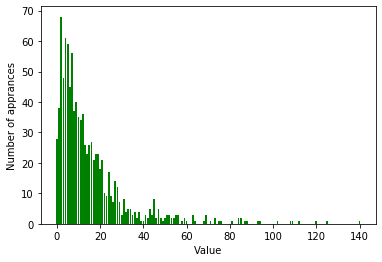

In [24]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)

X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)

# 统计每个特征出现的次数
print('Number of feature appearance:\n', np.bincount(X[:, 0]))

# 可视化第一列特征分布
counts = np.bincount(X[:, 0])
plt.bar(range(len(counts)), counts, color='g')
plt.ylabel('Number of apprances')
plt.xlabel('Value')
plt.show()

### 使用岭回归拟合数据

In [25]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import  train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print('Test score:{:.3f}'.format(score))

Test score:0.622


### 对数变换

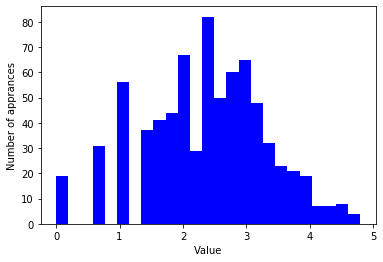

In [26]:
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

plt.hist(X_train_log[:, 0], bins=25, color='b')
plt.ylabel('Number of apprances')
plt.xlabel('Value')
plt.show()

### 变换后的数据使用岭回归

In [27]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print('Test score:{:.3f}'.format(score))

Test score:0.875


# 自动化特征选择

处理高维特征时选择最有用的特征主要的方法有：

- 单变量统计（univariate statistics）
- 基于模型的选择（model-based selection）
- 迭代选择（iterative selection）

## 单变量统计

计算每个特征和目标值之间的关系是否存在统计显著性，不能考虑到特征的联合作用

选择一项测试完成单变量特征选择:

- 分类问题中通常使用f_classif
- 回归问题中使用f_regression

基于测试的p值舍去部分特征，策略有：
- SelectBest
- SelectPercentile


选择特征

In [28]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split

canser = load_breast_cancer()

# 获得确定性的随机数
rng = np.random.RandomState()
# 生成50列噪声
noise = rng.normal(size=(len(canser.data), 50))
# 添加噪声数据
X_w_noise = np.hstack([canser.data, noise])

X_train, X_test, y_train, y_test = train_test_split(X_w_noise, canser.target,
                                                    random_state=0, test_size=0.5)

select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)
X_train_selected = select.transform(X_train)

print('shape of X_train:', X_train.shape)
print('shape of X_train_selected:', X_train_selected.shape)


shape of X_train: (284, 80)
shape of X_train_selected: (284, 40)


可视化特征选择

[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False  True False  True False False
 False  True False  True False  True False False False False  True False
  True False False False False  True False False  True False False False
 False False False  True False False False  True  True False  True False
 False False False  True False False False False]


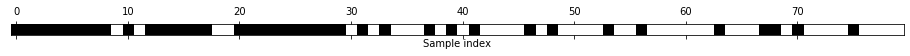

In [29]:
mask = select.get_support()
print(mask)
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.yticks(())
plt.xlabel('Sample index')
plt.show()

特征选择后模型测试

In [30]:
from sklearn.linear_model import LogisticRegression

# 对测试数据进行变换
X_test_selected = select.transform(X_test)

lr = LogisticRegression().fit(X_train, y_train)
print('Score with all feature:', lr.score(X_test, y_test))

lr = LogisticRegression().fit(X_train_selected, y_train)
print('Score with selected feature:', lr.score(X_test_selected, y_test))

Score with all feature: 0.9228070175438596
Score with selected feature: 0.9333333333333333


/home/inory/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/inory/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## 基于模型的特征选择

使用监督的机器学习模型判断特征的重要性。使用重要性度量，主要有：

- 决策数类的模型提供`feature_importances_`属性
- 线性模型的系数可以决定特征重要性

选择特征

In [31]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

# 创建特征选择模型
select = SelectFromModel(
    RandomForestClassifier(n_estimators=100, random_state=42),
    threshold='median'
)

select.fit(X_train, y_train)
X_train_model_selected = select.transform(X_train)
print('Shape of X_train:', X_train.shape)
print('Sahpe of X_train_model_selected', X_train_model_selected.shape)

Shape of X_train: (284, 80)
Sahpe of X_train_model_selected (284, 40)


可视化特征选择

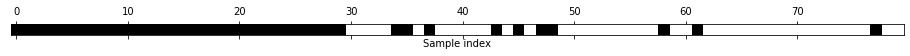

In [32]:
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.yticks(())
plt.xlabel('Sample index')
plt.show()

预测测试

In [33]:
X_test_model_selected = select.transform(X_test)
score = LogisticRegression().fit(X_train_model_selected, y_train).score(X_test_model_selected, y_test)
print('Test score:{:.3f}'.format(score))

Test score:0.940


/home/inory/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## 迭代特征选择

逐渐添加特征或逐渐删除特征

一种比较典型的方法是递归特征消除（recursive feature elimination, RFE）

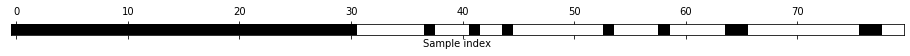

In [34]:
from sklearn.feature_selection import RFE

select = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=40)
select.fit(X_train, y_train)
# 将选中的特征可视化
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.yticks(())
plt.xlabel('Sample index')
plt.show()

In [35]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

score = LogisticRegression().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print('Test score:{:.3f}'.format(score))

Test score:0.947


/home/inory/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


也可以使用内置的模型预测分数

In [36]:
print('Test score:{:.3f}'.format(select.score(X_test, y_test)))

Test score:0.947


# 利用专家知识-citybike自行车组量预测

## 加载数据集

In [56]:
citybike = mglearn.datasets.load_citibike()
print('City bike data:\n')
citybike.head(16)

print(type(citybike.index))
print(citybike.index[:3])
print(citybike.index.day[:3])

City bike data:

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
DatetimeIndex(['2015-08-01 00:00:00', '2015-08-01 03:00:00',
               '2015-08-01 06:00:00'],
              dtype='datetime64[ns]', name='starttime', freq='3H')
Int64Index([1, 1, 1], dtype='int64', name='starttime')


可视化展示

/home/inory/.local/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


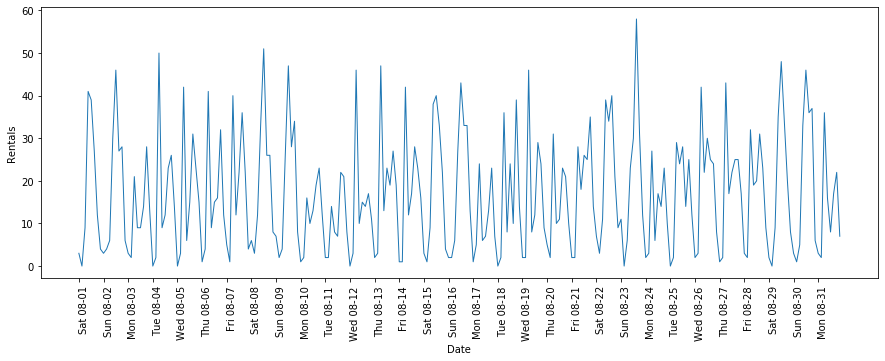

In [38]:
plt.figure(figsize=(15, 5))
xticks = pd.date_range(start=citybike.index.min(), end=citybike.index.max(), freq='D')
plt.xticks(xticks, xticks.strftime('%a %m-%d'), rotation=90, ha='left')
plt.plot(citybike, linewidth=1)
plt.xlabel('Date')
plt.ylabel('Rentals')
plt.show()

划分数据集

In [39]:
# 租车数量
y = citybike.values
# 时间表示（POSIX时间）
X = citybike.index.strftime('%s').astype('int').values.reshape(-1, 1)


print('num of samples:', len(y))
print('num of days:', len(y) / 8)

n_train = 184

def eval_on_features(features, target, regressor):
    # 对给定特征划分训练集和测试集
    X_train, X_test = features[:n_train], features[n_train:]
    # 划分目标
    y_train, y_test = target[:n_train], target[n_train:]
    regressor.fit(X_train, y_train)
    print('Test-set-R^2:{:.2f}'.format(regressor.score(X_test, y_test)))
    
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    
    plt.figure(figsize=(15, 5))
    plt.xticks(range(0, len(X), 8), xticks.strftime('%a %m-%d'), rotation=90, ha='left')
    
    plt.plot(range(n_train), y_train, label='train')
    plt.plot(range(n_train), y_pred_train, '--', label='prediction train')
    plt.plot(range(n_train, len(y_test) + n_train), y_test, label='test')
    plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--', label='prediction test')
    
    plt.legend(loc=(1.01, 0))
    plt.xlabel('Date')
    plt.ylabel('Rentals')
    plt.show()
    

num of samples: 248
num of days: 31.0


## 时间特征的随机森林预测

随机森林预测无法外推（extrapolate）

Test-set-R^2:-0.04


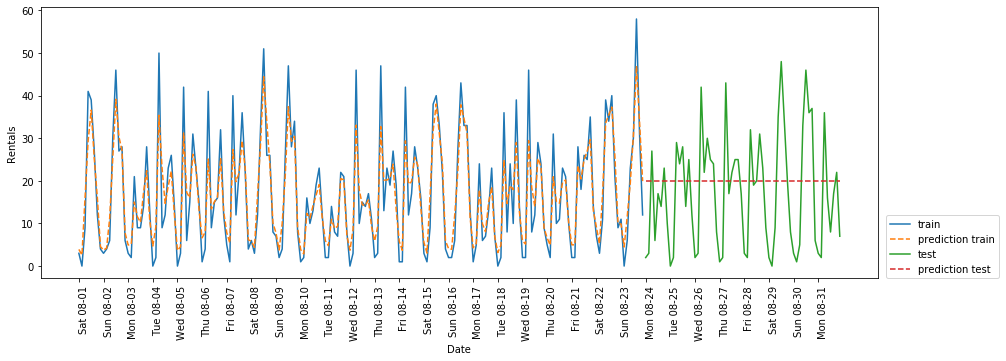

In [40]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)

eval_on_features(X, y, regressor)

只使用小时作为特征

Test-set-R^2:0.60


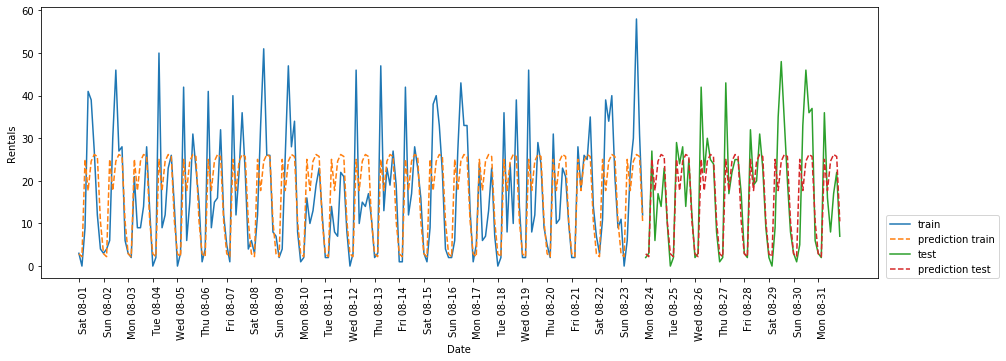

In [41]:
X_hour = citybike.index.hour.values.reshape(-1, 1)
eval_on_features(X_hour, y, regressor)

添加星期信息作为特征

Test-set-R^2:0.84


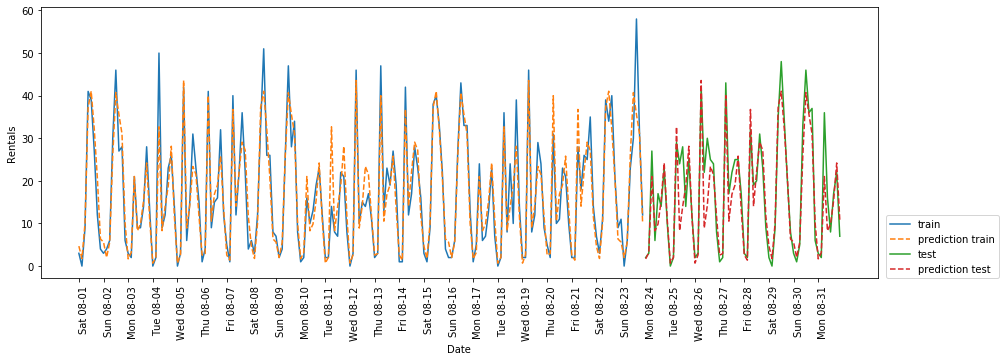

In [42]:
X_hour_week = np.hstack([citybike.index.hour.values.reshape(-1, 1), 
                         citybike.index.dayofweek.values.reshape(-1, 1)])
eval_on_features(X_hour_week, y, regressor)

## 时间特征的线性模型预测

直接使用线性模型预测小时-星期特征

Test-set-R^2:0.13


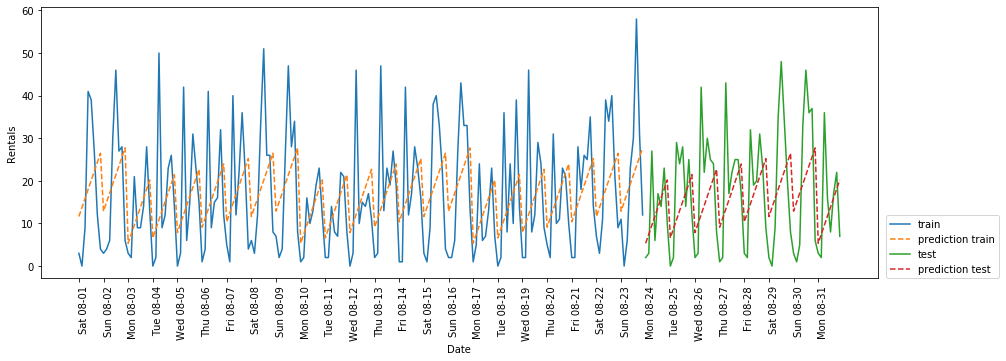

In [43]:
from sklearn.linear_model import LinearRegression

eval_on_features(X_hour_week, y, LinearRegression())

将整数解释为分类变量

- 为一周的每天、每个小时分别学到一个系数
- 不同天的同一小时仍然共享系数

Test-set-R^2:0.62


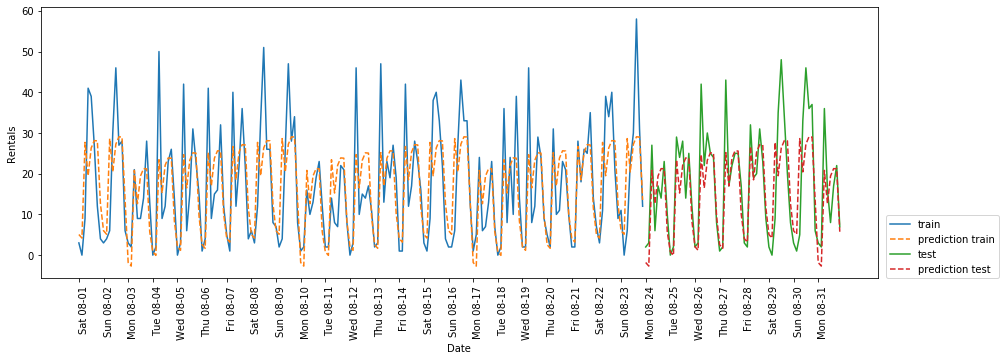

In [44]:
enc = OneHotEncoder(categories='auto')
X_hour_week_onhot = enc.fit_transform(X_hour_week).toarray()
eval_on_features(X_hour_week_onhot, y, LinearRegression())

添加交互特征

Test-set-R^2:0.84


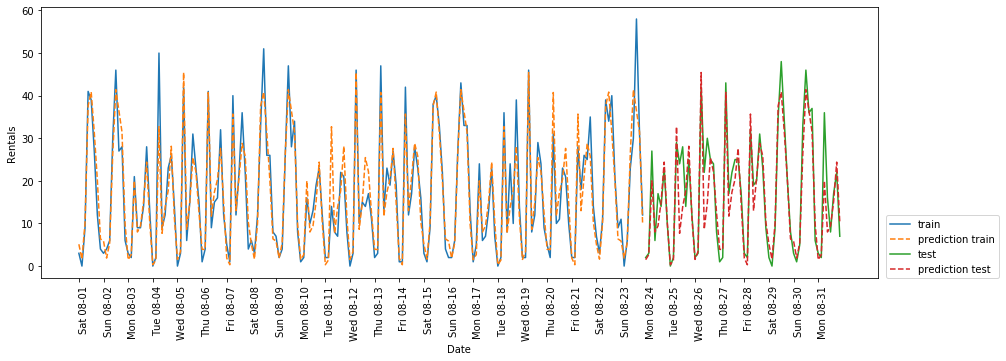

In [45]:
poly_transformer = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_hour_week_onehot_poly = poly_transformer.fit_transform(X_hour_week_onhot)
eval_on_features(X_hour_week_onehot_poly, y, LinearRegression())

使用线性模型加特征表示、特征交互的可解释性强，绘制出每个特征的系数